# Entity Resolution project @ Wavestone
## Blocking with sentence embeddings

> **Tristan PERROT**


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [3]:
while 'model' not in os.listdir():
    os.chdir('..')

In [4]:
from model.utils import load_data

In [5]:
DATA_NAME = 'amazon-google'
DATA_DIR = os.path.join('data', DATA_NAME)

In [6]:
table_a_serialized, table_b_serialized, X_train_ids, y_train, X_valid_ids, y_valid, X_test_ids, y_test = load_data(DATA_DIR, remove_col_names=True, order_cols=False)
table_a_serialized[:5]

Table A columns:
    column_name data_example
1   description          NaN
2  manufacturer   broderbund
3         price          0.0 

Table B columns:
    column_name              data_example
1   description  learning quickbooks 2007
2  manufacturer                    intuit
3         price                     38.99 

Serialized entities 



['clickart 950 000 - premier image pack (dvd-rom)  broderbund 0.0',
 "noah's ark activity center (jewel case ages 3-8)  victory multimedia 0.0",
 "peachtree by sage premium accounting for nonprofits 2007 peachtree premium accounting for nonprofits 2007 is the affordable easy to use accounting solution that provides you with donor/grantor management. if you're like most nonprofit organizations you're constantly striving to maximize each and every dollar of your annual operating budget. financial reporting by programs and funds advanced operational reporting and the rock-solid core accounting features that have made peachtree the choice of hundreds of thousands of small businesses. the result is an accounting solution tailor-made for the challenges of operating a nonprofit organization. keep an audit trail to record and report on any changes made to your transactions improve data integrity with prior period locking archive your organization's data for snap shots of your data before you c

## Pre-processing

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from tqdm.notebook import tqdm, trange
from model.Blocking import merge_indices, merge_true_matches, perform_blocking_sbert, perform_blocking_tfidf, get_blocking_metrics

/home/jovyan/.local/lib/python3.10/site-packages/transformers/utils/hub.py:128: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/opt/conda/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
2025-02-05 20:28:32.277354: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS

In [8]:
MODEL_NAMES = [
    'sentence-transformers/allenai-specter',
    'all-distilroberta-v1',
    'all-mpnet-base-v2',
    'multi-qa-mpnet-base-dot-v1',
]

In [9]:
all_true_matches = merge_true_matches(X_train_ids, y_train, X_valid_ids, y_valid, X_test_ids, y_test)

## Training

In [10]:
list_f1_scores_vs_n_neighbors = []
list_recall_vs_n_neighbors = []
k_s = list(range(1,30))

for model_name in MODEL_NAMES:
    print(f'Performing blocking with model {model_name}...')
    f1_scores_vs_n_neighbors = []
    recall_vs_n_neighbors = []
    for k in tqdm(k_s, desc=f'K neighbors for model {model_name}...'):
        indices = perform_blocking_sbert(model_name, table_a_serialized, table_b_serialized, n_neighbors=k, device=device)
        reduction_ratio, recall, f1 = get_blocking_metrics(indices, all_true_matches, len(table_a_serialized), len(table_b_serialized))
        f1_scores_vs_n_neighbors.append(f1)
        recall_vs_n_neighbors.append(recall)
    list_f1_scores_vs_n_neighbors.append(f1_scores_vs_n_neighbors)
    list_recall_vs_n_neighbors.append(recall_vs_n_neighbors)

Performing blocking with model sentence-transformers/allenai-specter...


K neighbors for model sentence-transformers/allenai-specter...:   0%|          | 0/29 [00:00<?, ?it/s]

Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model

K neighbors for model all-distilroberta-v1...:   0%|          | 0/29 [00:00<?, ?it/s]

Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model

K neighbors for model all-mpnet-base-v2...:   0%|          | 0/29 [00:00<?, ?it/s]

Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model

K neighbors for model multi-qa-mpnet-base-dot-v1...:   0%|          | 0/29 [00:00<?, ?it/s]

Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model

In [11]:
tfidf_f1_scores_vs_n_neighbors = []
tfidf_recall_vs_n_neighbors = []
for k in tqdm(k_s, desc='Performing blocking with TF-IDF...'):
    tfidif_indices = perform_blocking_tfidf(table_a_serialized, table_b_serialized, n_neighbors=k)
    reduction_ratio, recall, f1 = get_blocking_metrics(tfidif_indices, all_true_matches, len(table_a_serialized), len(table_b_serialized))
    tfidf_f1_scores_vs_n_neighbors.append(f1)
    tfidf_recall_vs_n_neighbors.append(recall)
list_f1_scores_vs_n_neighbors.append(tfidf_f1_scores_vs_n_neighbors)
list_recall_vs_n_neighbors.append(tfidf_recall_vs_n_neighbors)

Performing blocking with TF-IDF...:   0%|          | 0/29 [00:00<?, ?it/s]

Table A vectorized
Table B vectorized
k-NN model fitted
Table A vectorized
Table B vectorized
k-NN model fitted
Table A vectorized
Table B vectorized
k-NN model fitted
Table A vectorized
Table B vectorized
k-NN model fitted
Table A vectorized
Table B vectorized
k-NN model fitted
Table A vectorized
Table B vectorized
k-NN model fitted
Table A vectorized
Table B vectorized
k-NN model fitted
Table A vectorized
Table B vectorized
k-NN model fitted
Table A vectorized
Table B vectorized
k-NN model fitted
Table A vectorized
Table B vectorized
k-NN model fitted
Table A vectorized
Table B vectorized
k-NN model fitted
Table A vectorized
Table B vectorized
k-NN model fitted
Table A vectorized
Table B vectorized
k-NN model fitted
Table A vectorized
Table B vectorized
k-NN model fitted
Table A vectorized
Table B vectorized
k-NN model fitted
Table A vectorized
Table B vectorized
k-NN model fitted
Table A vectorized
Table B vectorized
k-NN model fitted
Table A vectorized
Table B vectorized
k-NN model

In [12]:
# TF-IDF merged with best SBERT model
merged_f1_scores_vs_n_neighbors = []
merge_recall_vs_n_neighbors = []
for k in tqdm(k_s, desc='Merging SBERT and TF-IDF...'):
    sbert_indices = perform_blocking_sbert(MODEL_NAMES[-1], table_a_serialized, table_b_serialized, n_neighbors=k, device=device)
    tfidf_indices = perform_blocking_tfidf(table_a_serialized, table_b_serialized, n_neighbors=k)
    merged_indices = merge_indices(sbert_indices, tfidf_indices)
    reduction_ratio, recall, f1 = get_blocking_metrics(merged_indices, all_true_matches, len(table_a_serialized), len(table_b_serialized))
    merged_f1_scores_vs_n_neighbors.append(f1)
    merge_recall_vs_n_neighbors.append(recall)

Merging SBERT and TF-IDF...:   0%|          | 0/29 [00:00<?, ?it/s]

Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Table A vectorized
Table B vectorized
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Table A vectorized
Table B vectorized
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Table A vectorized
Table B vectorized
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Table A vectorized
Table B vectorized
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Table A vectorized
Table B vectorized
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Table A vectorized
Table B vectorized
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Table A vectorized
Table B vectorized
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-NN model fitted
Table A vectorized
Table B vectorized
k-NN model fitted
Model loaded
Table A encoded
Table B encoded
k-N

#### Plot

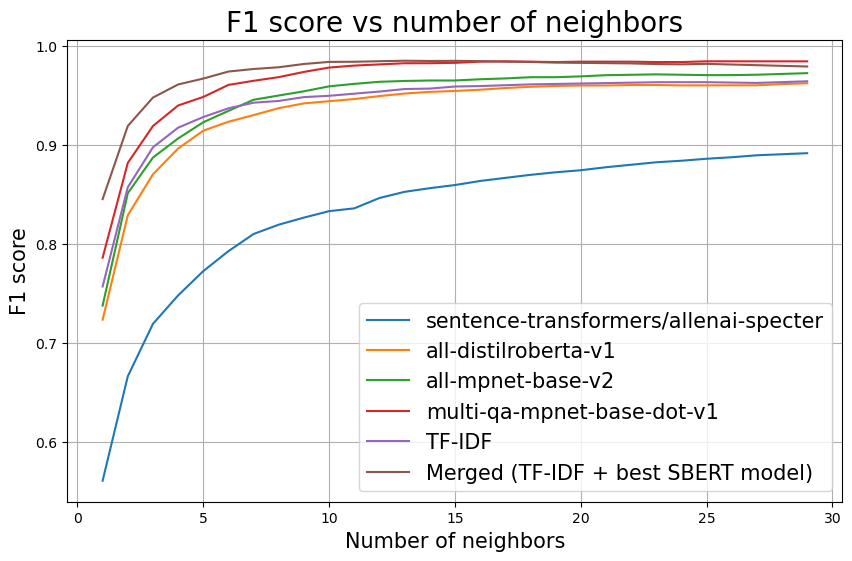

In [13]:
plt.figure(figsize=(10, 6))
for i, model_name in enumerate(MODEL_NAMES):
    plt.plot(k_s, list_f1_scores_vs_n_neighbors[i], label=model_name)
plt.plot(k_s, tfidf_f1_scores_vs_n_neighbors, label='TF-IDF')
plt.plot(k_s, merged_f1_scores_vs_n_neighbors, label='Merged (TF-IDF + best SBERT model)')
plt.xlabel('Number of neighbors', fontsize=15)
plt.ylabel('F1 score', fontsize=15)
plt.title('F1 score vs number of neighbors', fontsize=20)
plt.legend(prop={'size': 15})
plt.grid()
plt.show()

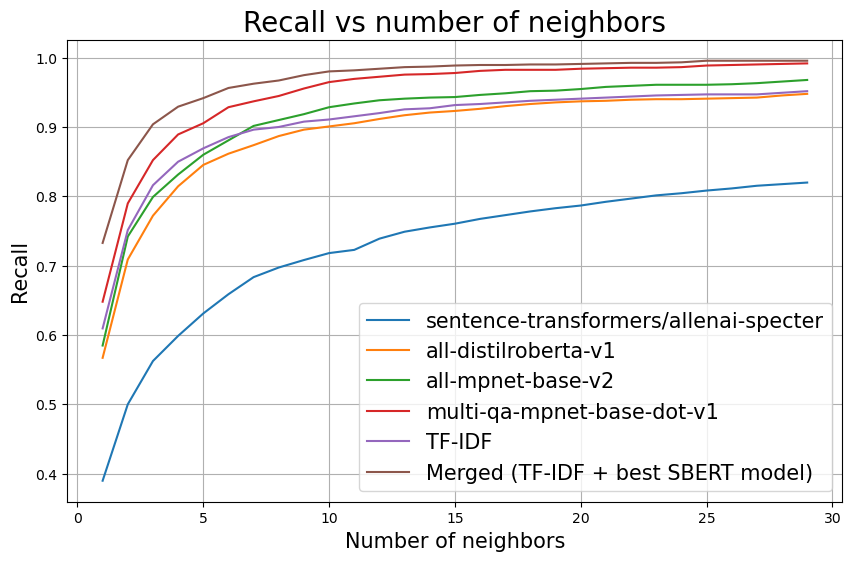

In [14]:
plt.figure(figsize=(10, 6))
for i, model_name in enumerate(MODEL_NAMES):
    plt.plot(k_s, list_recall_vs_n_neighbors[i], label=model_name)
plt.plot(k_s, tfidf_recall_vs_n_neighbors, label='TF-IDF')
plt.plot(k_s, merge_recall_vs_n_neighbors, label='Merged (TF-IDF + best SBERT model)')
plt.xlabel('Number of neighbors', fontsize=15)
plt.ylabel('Recall', fontsize=15)
plt.title('Recall vs number of neighbors', fontsize=20)
plt.legend(prop={'size': 15})
plt.grid()

plt.show()